# ACML Assignment 1

In [47]:
import numpy as np

### Create the training data 

In [32]:
inputs = []

for i in range(8):
    input = np.zeros(((8+1),1)) # +1 is the bias
    input[0] = 1 # bias at the beginning of the input
    input[i+1] = 1
    inputs.append(input)

### Define functions

In [33]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def softmax(x):
    e = np.exp(x)
    return(e/e.sum())

def argmax(x): 
    a2_index = np.argmax(x)
    a2 = np.zeros(8)
    a2[a2_index] = 1
    return(a2)

def forward_prop(a0, W1, W2):
    a1 = sigmoid(np.dot(W1, a0)) 
    a1 = np.insert(a1, 0, 1) # insert bias to make it (4x1)
    a2 = sigmoid(np.dot(W2, a1))
    return(a1, a2) # returns (4x1), (8x1)

def back_prop(a0, a1, a2, W2):
    
    cost_MSE = np.sum(np.square(a2 - a0))

    # compute the deltas for layer 2 and 1
    delta2 = (a2 - a0) # deltas in layer 2 (output)

    delta1 = a1 * (np.ones(4) - a1) * np.dot(W2.T, delta2) # deltas in layer 1 (hidden)
    #         (4x1) * ((4x1) - (4x1))  *  ((4x8) . (8x1))   = (4x1)
    #                                          (4x1)

    # compute the partial derivatives for weigthts 2
    deriv_W_2 = np.dot(delta2.reshape(8,1), a1.reshape(1,4))

    # compute the partial derivatives for weights 1
        ## insert bias to a0
    a0_with_bias = np.insert(a0, 0, 1)
    
        ## delete bias for delta1
    delta1 = np.delete(delta1, 0)
    deriv_W_1 = np.dot(delta1.reshape(3, 1), a0_with_bias.reshape(1, 9))
    return(deriv_W_1, deriv_W_2, cost_MSE)


def train(inputs, W1, W2, batch_size, epochs, lr, weight_decay):
    loss = list()
    # loop over number of iterations
    for _ in range(epochs):

        # loop over batch size
        deriv1_outer = np.zeros((3,9))
        deriv2_outer = np.zeros((8,4))
        for _ in range(batch_size): 
            
            # select a random training sample
            train_sample = inputs[np.random.randint(0, 8)]
            
            # perform forward propagation
            ta1, ta2 = forward_prop(train_sample, W1, W2)
            
            # perform backward propagation
            y = np.delete(train_sample, 0)
            deriv1, deriv2, cost = back_prop(y, ta1, ta2, W2)
            
            # add the partial derivatives to the batch derivatives
            deriv1_outer = deriv1_outer + deriv1
            deriv2_outer = deriv2_outer + deriv2
            loss.append(cost)

        W1_new = W1 - (lr * ((1/batch_size) * deriv1_outer + weight_decay * W1))
        W2_new = W2 - (lr * ((1/batch_size) * deriv2_outer + weight_decay * W2))
        W1_new[:,0] = W1[:,0] - lr * (1/batch_size) * deriv1_outer[:,0]
        W2_new[:,0] = W2[:,0] - lr * (1/batch_size) * deriv2_outer[:,0]
        W1 = W1_new
        W2 = W2_new
    return(W1, W2, loss)

### Parameters and training of model

In [38]:
# Initialize Weights
W1 = np.random.normal(0, 0.01, 3*9).reshape(3, 9) # 3x9 matrix
W2 = np.random.normal(0, 0.01, 8*4).reshape(8, 4) # 8x4 matrix

# Train the model
W1_final, W2_final, loss = train(
    inputs = inputs,
    W1 = W1,
    W2 = W2, 
    batch_size = 8,
    epochs = 20000, 
    lr = 0.5,
    weight_decay = 0.0001)

print(W1_final, W2_final)

[[-0.41589785  2.22036062  5.645864   -3.89345498 -3.1574496   0.66560024
   0.55249768 -4.50215038  2.34332337]
 [-0.09890842 -3.75090477  0.11544949  2.6450657  -4.13216537  4.65402212
  -4.17982098  0.30452717  4.35423488]
 [-0.00703658  4.03086085 -1.21519864  3.57051043  1.1107787  -4.00224389
  -4.38552573 -3.09417715  3.95550888]] [[-10.54991912   7.83403944  -9.27377256   8.03381741]
 [-14.95463713  19.69654228  -0.11712835  -6.84201913]
 [-10.35422144 -10.86187048   7.23632518   7.97223885]
 [  1.27822338 -11.73426242 -11.58522251   4.0400121 ]
 [-10.69206067   2.75700439  12.83258747 -11.70828755]
 [  2.49068592   2.22416847 -12.41633515 -10.91442166]
 [  3.13440205 -15.48318868   1.62987318 -10.20874508]
 [-20.5169826    8.83073383   9.27165675   7.56196891]]


There is no obvious interpretation of the calculated weights.

### Training the model with several learning rates

In [35]:
lr_list = [0.01, 0.1, 0.5, 0.9]
losses = list()

for lr in lr_list:
    W1 = np.random.normal(0, 0.01, 3*9).reshape(3, 9) # 3x9 matrix
    W2 = np.random.normal(0, 0.01, 8*4).reshape(8, 4) # 8x4 matrix

    _, _, loss = train(
        inputs = inputs,
        W1 = W1,
        W2 = W2, 
        batch_size = 8,
        epochs = 20000, 
        lr = lr,
        weight_decay = 0.0001
    )

    losses.append(loss)

### Plotting the model

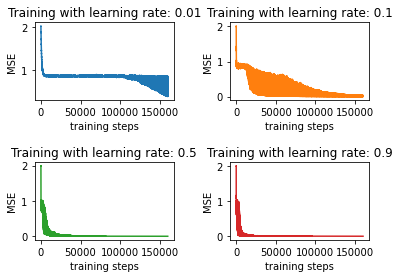

In [36]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)
figure.subplots_adjust(hspace=0.8, wspace=0.4)

axis[0, 0].plot((list(range(len(losses[0])))), losses[0])
axis[0, 0].set_title(f"Training with learning rate: {lr_list[0]}")

axis[0, 1].plot((list(range(len(losses[1])))), losses[1], 'tab:orange')
axis[0, 1].set_title(f"Training with learning rate: {lr_list[1]}")
  
axis[1, 0].plot((list(range(len(losses[2])))), losses[2], 'tab:green')
axis[1, 0].set_title(f"Training with learning rate: {lr_list[2]}")
  
axis[1, 1].plot((list(range(len(losses[3])))), losses[3], 'tab:red')
axis[1, 1].set_title(f"Training with learning rate: {lr_list[3]}")
  
for ax in axis.flat:
    ax.set(xlabel='training steps', ylabel='MSE')

plt.show()

As can be seen in the four plots, the higher the learning rate, the faster the mean square error converges to 0 (i.e. it needs less training epochs). This can be observed due to the simplicity of the problem, allowing for high learning rates to still converge to an acceptable optimum, and not ending up at a local minimum. 
For a very low learning rate, such as 0.01, the mean square error stagnates at around 0.9, and only converges to 0 after more than 150000 training iterations. 

### Prediction with the model

In [51]:
# select some input
for index in range(8):
    print("For the input       ", np.delete(inputs[index], 0).reshape(1,-1)[0])
    a1, output = forward_prop(inputs[index], W1_final, W2_final)
    print("The model predicts: ", argmax(output))
    print("a1 is: ", np.delete(a1, 0))
    print("a1 rounded is: ", np.delete(a1.round(), 0))
    print("--------------------------------")

For the input        [1. 0. 0. 0. 0. 0. 0. 0.]
The model predicts:  [1. 0. 0. 0. 0. 0. 0. 0.]
a1 is:  [0.85869132 0.02084016 0.98242979]
a1 rounded is:  [1. 0. 1.]
--------------------------------
For the input        [0. 1. 0. 0. 0. 0. 0. 0.]
The model predicts:  [0. 1. 0. 0. 0. 0. 0. 0.]
a1 is:  [0.9946748  0.50413518 0.22754333]
a1 rounded is:  [1. 1. 0.]
--------------------------------
For the input        [0. 0. 1. 0. 0. 0. 0. 0.]
The model predicts:  [0. 0. 1. 0. 0. 0. 0. 0.]
a1 is:  [0.01326395 0.92731493 0.97244083]
a1 rounded is:  [0. 1. 1.]
--------------------------------
For the input        [0. 0. 0. 1. 0. 0. 0. 0.]
The model predicts:  [0. 0. 0. 1. 0. 0. 0. 0.]
a1 is:  [0.02729579 0.01432848 0.75096061]
a1 rounded is:  [0. 0. 1.]
--------------------------------
For the input        [0. 0. 0. 0. 1. 0. 0. 0.]
The model predicts:  [0. 0. 0. 0. 1. 0. 0. 0.]
a1 is:  [0.56210325 0.98959607 0.01782302]
a1 rounded is:  [1. 1. 0.]
--------------------------------
For the input  

Here, the following parameters are used: 
batch_size = 8, epochs = 20000, lr = 0.5, weight_decay = 0.0001

As shown above, the model predicts correctly for all possible input values. 
Further, the values for a1 (hidden layer) are also displayed here, once not rounded, and once rounded to 0 or 1. As can be observed from the rounded vectors for a1, almost every input vector gets encoded into a different binary value in the hidden layer. The only exception is the binary value of [1 1 0], which occurs twice. However, as shown in the unrounded values, these two cases are actually pretty well separated: 
[0.995 0.504 0.228] and 
[0.562 0.990 0.018]
